In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [37]:
pwd

'C:\\Users\\18644\\Desktop\\THINKFUL\\Data Science Bootcamp\\UNIT 2\\Capstone'

In [38]:
df = pd.read_csv('googleplaystore.csv', encoding = 'latin1')

In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [40]:
print(df.shape)

(10841, 13)


In [41]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [42]:
df.dropna(how = 'any', inplace = True)

In [43]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [44]:
df.shape


(9360, 13)

In [45]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [46]:
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))

In [47]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [48]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [49]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 
df['Size']=df['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
    df['Size'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)

In [50]:
df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+03, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03, 9.20e+03,
       5.20e+03, 1.10e+04, 2.40e+04,      nan, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.70e+03, 2.50e+03, 7.00e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 2.20e+04, 6.40e+03, 3.20e+03, 8.20e+03, 4.90e+03,
       9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04, 7.30e+04, 6.80e+03,
       3.50e+03, 4.00e+03, 2.30e+03, 2.10e+03, 4.20e+04, 9.10e+03,
       5.50e+04, 2.30e+01, 7.30e+03, 6.50e+03, 1.50e+03, 7.50e

In [51]:
df.shape

(9360, 13)

In [52]:
df['Size'] = df['Size'].fillna((df['Size'].mean()))

In [53]:
df['Size'].unique()

array([1.90000000e+04, 1.40000000e+04, 8.70000000e+03, 2.50000000e+04,
       2.80000000e+03, 5.60000000e+03, 2.90000000e+04, 3.30000000e+04,
       3.10000000e+03, 2.80000000e+04, 1.20000000e+04, 2.00000000e+04,
       2.10000000e+04, 3.70000000e+04, 5.50000000e+03, 1.70000000e+04,
       3.90000000e+04, 3.10000000e+04, 4.20000000e+03, 2.30000000e+04,
       6.00000000e+03, 6.10000000e+03, 4.60000000e+03, 9.20000000e+03,
       5.20000000e+03, 1.10000000e+04, 2.40000000e+04, 2.29704561e+04,
       9.40000000e+03, 1.50000000e+04, 1.00000000e+04, 1.20000000e+03,
       2.60000000e+04, 8.00000000e+03, 7.90000000e+03, 5.60000000e+04,
       5.70000000e+04, 3.50000000e+04, 5.40000000e+04, 2.01000000e+02,
       3.60000000e+03, 5.70000000e+03, 8.60000000e+03, 2.40000000e+03,
       2.70000000e+04, 2.70000000e+03, 2.50000000e+03, 7.00000000e+03,
       1.60000000e+04, 3.40000000e+03, 8.90000000e+03, 3.90000000e+03,
       2.90000000e+03, 3.80000000e+04, 3.20000000e+04, 5.40000000e+03,
      

In [54]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

In [55]:
df.Price=df.Price.apply(lambda x: x.strip('$'))

In [56]:
df['Price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '7.99 ', '5.99 ', '2.99 ', '3.49 ',
       '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ', '10.00 ',
       '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ', '29.99 ',
       '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ', '15.99 ', '33.99 ',
       '39.99 ', '3.95 ', '4.49 ', '1.70 ', '8.99 ', '1.49 ', '3.88 ',
       '399.99 ', '17.99 ', '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ',
       '1.61 ', '2.50 ', '1.59 ', '6.49 ', '1.29 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '8.49 ', '1.75 ', '14.00 ', '2.00 ',
       '3.08 ', '2.59 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ', '3.04 ',
       '13.99 ', '4.29 ', '3.28 ', '4.60 ', '1.00 ', '2.95 ', '2.90 ',
       '1.97 ', '2.56 ', '1.20 '], dtype=object)

In [57]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [58]:
df['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [59]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [60]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.000000,50000,Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.000000,1000000,Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.000000,1000000,Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.000000,10000,Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [61]:
df['Genres'].value_counts()

Tools                                    732
Entertainment                            533
Education                                468
Action                                   358
Productivity                             351
Medical                                  350
Sports                                   333
Communication                            328
Finance                                  323
Photography                              317
Lifestyle                                313
Personalization                          312
Business                                 303
Health & Fitness                         297
Social                                   259
Shopping                                 238
News & Magazines                         233
Travel & Local                           225
Arcade                                   207
Dating                                   195
Simulation                               194
Casual                                   185
Books & Re

In [74]:
sns.set_style("white")
    
df_category= df.loc[
    ((df['Category'] == 'FAMILY') | (df['Category'] == 'ENTERTAINMENT')),
    ['Category', 'Rating', 'Reviews', 'Size', 'Installs','Price']
]

In [100]:
sns.set_style("white")
    
df_category= df.loc[
    ((df['Category'] == 'FAMILY') | (df['Category'] == 'ENTERTAINMENT')),
    ['Category', 'Rating', 'Size', 'Installs']
]

            Rating      Size  Installs
Rating    1.000000  0.071868  0.045326
Size      0.071868  1.000000  0.066895
Installs  0.045326  0.066895  1.000000


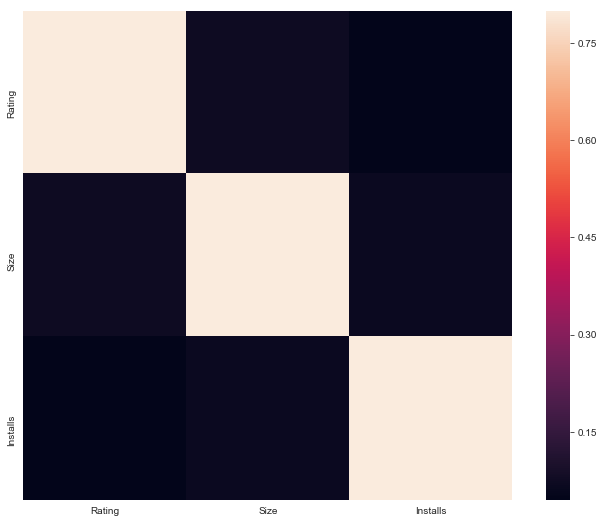

In [101]:
corrmat = df_category.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

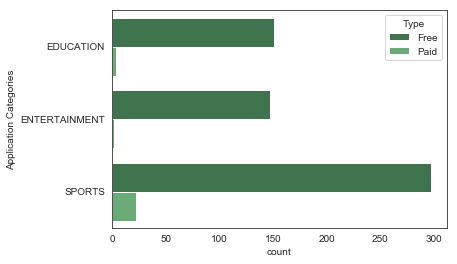

Type           Free  Paid
Category                 
EDUCATION       151     4
ENTERTAINMENT   147     2
SPORTS          297    22
Power_divergenceResult(statistic=659.0834670947032, pvalue=3.4438823257337456e-140)


In [98]:
df_2cat = df.loc[
    ((df['Category'] == 'ENTERTAINMENT') | (df['Category'] == 'EDUCATION')| (df['Category'] == 'SPORTS')),
    ['Category','Type']
]

sns.countplot(y="Category", hue="Type", data=df_2cat, palette="Greens_d")
plt.ylabel('Application Categories')
plt.show()

counttable = pd.crosstab(df_2cat['Category'], df_2cat['Type'])
print(counttable)

print(stats.chisquare(counttable, axis=None))

In [122]:
df_3_cat= df.loc[(df['Category'] == 'ENTERTAINMENT') | (df['Category'] == 'EDUCATION')]
    

In [123]:
df_cat_3= df.loc[
    ((df['Category'] == 'FAMILY') | (df['Category'] == 'ENTERTAINMENT')),
    ['Category', 'Rating',  'Size', 'Installs']
]

C:\Users\18644\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\18644\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


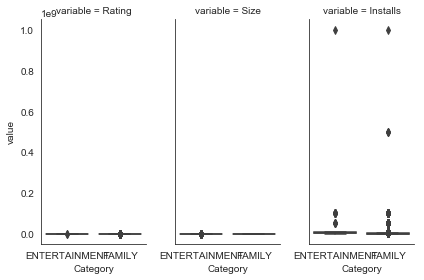

              Installs                                                  \
                 count          mean           std      min        25%   
Category                                                                 
ENTERTAINMENT    149.0  1.925611e+07  8.473043e+07  10000.0  1000000.0   
FAMILY          1746.0  5.874944e+06  3.473945e+07     10.0    10000.0   

                                                    Rating            \
                     50%         75%           max   count      mean   
Category                                                               
ENTERTAINMENT  5000000.0  10000000.0  1.000000e+09   149.0  4.126174   
FAMILY          100000.0   1000000.0  1.000000e+09  1746.0  4.192383   

                 ...                 Size                                      \
                 ...     75%  max   count          mean           std     min   
Category         ...                                                            
ENTERTAINMENT    ...     

In [132]:
df_long = df_cat_3
df_long = pd.melt(df_long, id_vars=['Category'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Category", "value")
plt.show()

# Descriptive statistics by group.
print(df_cat_3.groupby('Category').describe())

# Test whether group differences are significant.
for col in df_cat_3.loc[:,'Rating':'Installs'].columns:
    print(col)
    print(stats.ttest_ind(
        df_cat_3[df_cat_3['Category'] == 'FAMILY'][col],
        df_cat_3[df_cat_3['Category'] == 'ENTERTAINMENT'][col]
    ))